In [18]:
import numpy  as np
import pandas as pd

import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
def min_max_scaler(column):
    _min = column.min()
    _max = column.max()
    return (column - _min)/(_max -_min)

def z_scaler(column):
    _mean = column.mean()
    _std  = column.std()
    return (column - _mean)/_std

In [20]:
dax    = pd.read_csv(r'data/returns_dax.csv')
nq     = pd.read_csv(r'data/returns_nq.csv')
dow    = pd.read_csv(r'data/returns_dow.csv')
crix   = pd.read_csv(r'data/returns_crix.csv')
snp500 = pd.read_csv(r'data/returns_snp500.csv')
crix   = crix.rename(columns={'date': 'Date'})

prices = pd.DataFrame({'timestamp' : dax.Date,
                       'dax'       : dax[['Open','High','Low','Close']].mean(axis=1),
                       'dow'       : dow[['Open','High','Low','Close']].mean(axis=1),
                       'crix'      : crix.price[1:].reset_index(drop=True),
                       'snp500'    : snp500[['Open','High','Low','Close']].mean(axis=1),
                       'nq'        : nq[['Open','High','Low','Close']].mean(axis=1)})

prices.index = pd.to_datetime(prices['timestamp'])
prices.drop('timestamp', axis=1, inplace = True)

prices = prices.apply(z_scaler)

<Figure size 432x288 with 0 Axes>

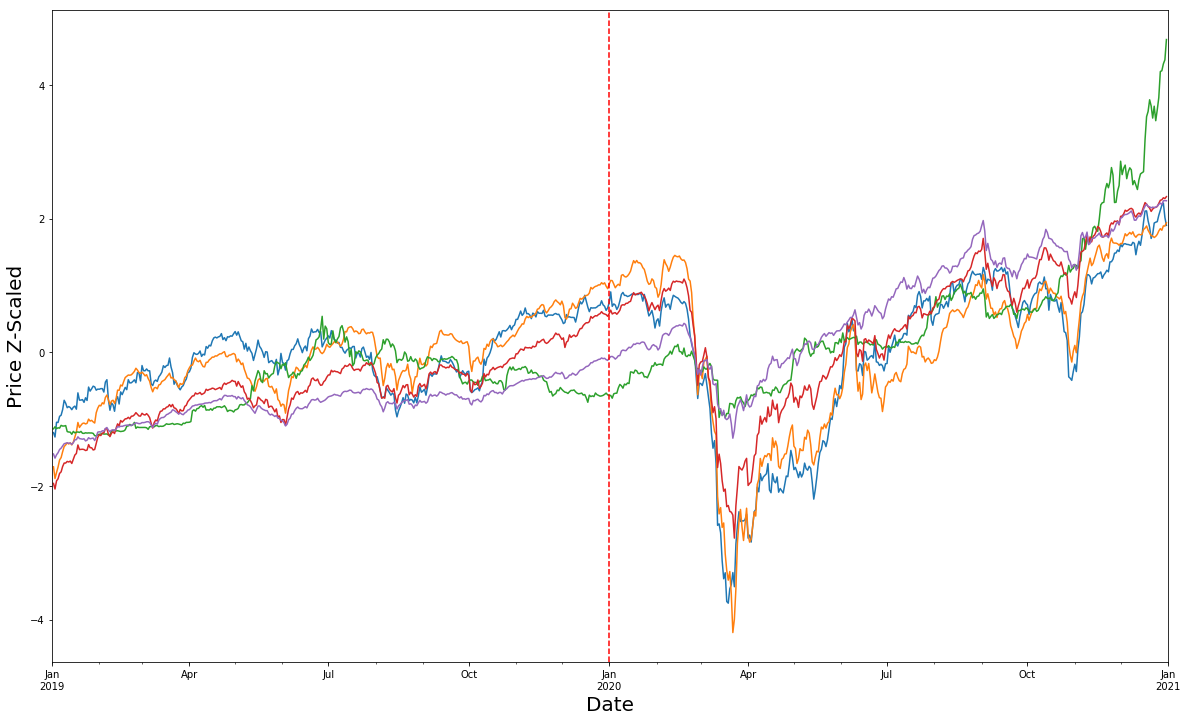

In [21]:
plt.figure()
ax = prices.plot(legend=False, figsize=(20, 12))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price Z-Scaled', fontsize=20)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2021, 1, 1)])
ax.axvline(pd.Timestamp('2020-01-1'), color='r', linestyle='--')
plt.savefig('Prices.png')

#### Colors used
crix 2ca02c
dow  fe7f0f
nq   9467bd
dax  1f77b4
snp500 d62728

date change fd3f3f

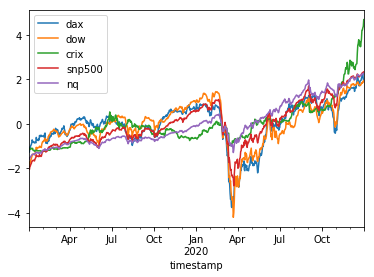

In [22]:
prices.plot()